<h1>Recommender System using KNN Item-Based Collaborative Filtering</h1> 


In [33]:
import pandas as pd

In [34]:
df_movies = pd.read_csv('movies.csv',usecols=['movieId', 'title'],
    dtype={'movieId': 'int32', 'title': 'str'})


In [35]:
df_ratings = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})



In [36]:
df_movies.tail()

,movieId,title
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)
9741,193609,Andrew Dice Clay: Dice Rules (1991)


In [37]:
df_ratings.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [38]:
df=df_ratings.groupby("movieId")
df=df["rating"].count()
l=[]
li=df_movies["movieId"].unique()
for i in li:
    if i in df:
        l.append(df[i])
        
    else:
        l.append(0)


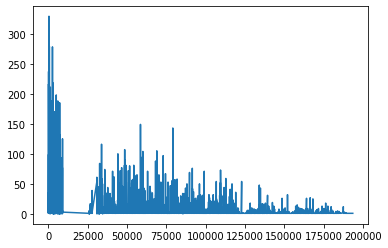

In [39]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x =df_movies["movieId"].unique()
# corresponding y axis values 
y = l
  
# plotting the points  
plt.plot(x,y)
plt.show()

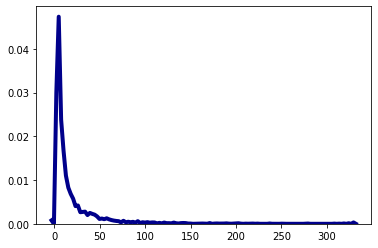

In [40]:
import seaborn as sns
sns.distplot(l, hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [41]:
df_movies_cnt = pd.DataFrame(
            df_ratings.groupby('movieId').size(),
            columns=['count'])
popular_movies = list(set(df_movies_cnt.query('count >50').index))  # noqa
movies_filter = df_ratings.movieId.isin(popular_movies).values


In [42]:
df_users_cnt = pd.DataFrame(
            df_ratings.groupby('userId').size(),
            columns=['count'])
active_users = list(set(df_users_cnt.query('count >500').index))  # noqa
users_filter = df_ratings.userId.isin(active_users).values

In [43]:
df_ratings_filtered = df_ratings[movies_filter & users_filter]
print(df_ratings_filtered)

        userId  movieId  rating
1772        18        1     3.5
1773        18        2     3.0
1774        18        6     4.0
1775        18       16     4.5
1776        18       32     4.0
...        ...      ...     ...
100657     610   106782     4.5
100672     610   109374     4.5
100673     610   109487     3.5
100701     610   112852     4.5
100742     610   122904     3.0

[10627 rows x 3 columns]


In [44]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
movie_user_mat = df_ratings_filtered.pivot(
            index='movieId', columns='userId', values='rating').fillna(0)


In [45]:
# create mapper from movie title to index
hashmap = {
            movie: i for i, movie in
            enumerate(list(df_movies.set_index('movieId').loc[movie_user_mat.index].title)) # noqa
        }
# transform matrix to scipy sparse matrix
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)
hashmap

{'Toy Story (1995)': 0,
 'Jumanji (1995)': 1,
 'Grumpier Old Men (1995)': 2,
 'Heat (1995)': 3,
 'Sabrina (1995)': 4,
 'GoldenEye (1995)': 5,
 'American President, The (1995)': 6,
 'Casino (1995)': 7,
 'Sense and Sensibility (1995)': 8,
 'Ace Ventura: When Nature Calls (1995)': 9,
 'Get Shorty (1995)': 10,
 'Leaving Las Vegas (1995)': 11,
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)': 12,
 'Babe (1995)': 13,
 'Dead Man Walking (1995)': 14,
 'Clueless (1995)': 15,
 'Seven (a.k.a. Se7en) (1995)': 16,
 'Pocahontas (1995)': 17,
 'Usual Suspects, The (1995)': 18,
 "Mr. Holland's Opus (1995)": 19,
 'From Dusk Till Dawn (1996)': 20,
 'Broken Arrow (1996)': 21,
 'Happy Gilmore (1996)': 22,
 'Braveheart (1995)': 23,
 'Taxi Driver (1976)': 24,
 'Birdcage, The (1996)': 25,
 'Bad Boys (1995)': 26,
 'Apollo 13 (1995)': 27,
 'Batman Forever (1995)': 28,
 'Casper (1995)': 29,
 'Congo (1995)': 30,
 'Crimson Tide (1995)': 31,
 'Desperado (1995)': 32,
 'Die Hard: With a Vengeance (1995)': 33,
 'First Kni

In [46]:
print(movie_user_mat_sparse)

  (0, 0)	3.5
  (0, 1)	4.0
  (0, 3)	4.0
  (0, 4)	2.5
  (0, 5)	3.0
  (0, 6)	4.0
  (0, 9)	3.0
  (0, 10)	5.0
  (0, 11)	4.0
  (0, 12)	4.0
  (0, 13)	3.5
  (0, 14)	3.5
  (0, 15)	3.5
  (0, 16)	4.0
  (0, 17)	4.0
  (0, 18)	4.5
  (0, 19)	2.0
  (0, 21)	4.0
  (0, 23)	5.0
  (0, 25)	4.0
  (0, 26)	4.5
  (0, 27)	5.0
  (0, 28)	4.0
  (0, 29)	4.0
  (0, 30)	3.0
  :	:
  (434, 10)	5.0
  (434, 16)	4.5
  (434, 19)	4.0
  (434, 20)	4.5
  (434, 23)	5.0
  (434, 25)	4.0
  (434, 27)	3.5
  (434, 33)	4.5
  (434, 35)	4.0
  (434, 37)	3.5
  (434, 42)	4.5
  (435, 0)	3.5
  (435, 4)	4.0
  (435, 7)	4.0
  (435, 8)	5.0
  (435, 16)	4.5
  (435, 19)	3.0
  (435, 20)	5.0
  (435, 23)	5.0
  (435, 25)	4.0
  (435, 27)	4.0
  (435, 33)	5.0
  (435, 35)	2.0
  (435, 37)	3.5
  (435, 42)	3.0


In [47]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm=
                             'brute', n_neighbors=20, n_jobs=-1)

In [48]:
model_knn.fit(movie_user_mat_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [49]:
from fuzzywuzzy import fuzz
import time

In [50]:
 def fuzzy_matching(hashmap, fav_movie):
        match_tuple = []
        # get match
        for title, idx in hashmap.items():
            ratio = fuzz.ratio(title.lower(), fav_movie.lower())
            if ratio >= 60:
                match_tuple.append((title, idx, ratio))
        # sort
        match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
        if not match_tuple:
            print('Oops! No match is found')
        else:
            print('Found possible matches in our database: '
                  '{0}\n'.format([x[0] for x in match_tuple]))
            return match_tuple[0][1]

In [51]:
def inference(model, data, hashmap,
                   fav_movie, n_recommendations):
        # fit
        model.fit(data)
        # get input movie index
        print('You have input movie:', fav_movie)
        idx =fuzzy_matching(hashmap, fav_movie)
        # inference
        print('Recommendation system start to make inference')
        print('......\n')
        t0 = time.time()
        distances, indices = model.kneighbors(
            data[idx],
            n_neighbors=n_recommendations+1)
        # get list of raw idx of recommendations
        print(indices)
        raw_recommends = \
            sorted(
                list(
                    zip(
                        indices.squeeze().tolist(),
                        distances.squeeze().tolist()
                    )
                ),
                key=lambda x: x[1]
            )[:0:-1]
        print('It took my system {:.2f}s to make inference \n\
              '.format(time.time() - t0))
        # return recommendation (movieId, distance)
        return raw_recommends


In [52]:
fav_movie=input("enter your favorite movie=")

enter your favorite movieiron man


In [53]:
raw_recommends =inference(
            NearestNeighbors(), movie_user_mat_sparse, hashmap,
            fav_movie, 6)
        # print results
reverse_hashmap = {v: k for k, v in hashmap.items()}
print('Recommendations for {}:'.format("Iron Man (2008)"))
for i, (idx, dist) in enumerate(raw_recommends):
      print('{0}: {1}, with distance ''of {2}'.format(i+1, reverse_hashmap[idx], dist))


You have input movie: iron man
Found possible matches in our database: ['Iron Man (2008)']

Recommendation system start to make inference
......

[[408 407 410 419 414 405 415]]
It took my system 0.00s to make inference 
              
Recommendations for Iron Man (2008):
1: Hangover, The (2009), with distance of 10.099504470825195
2: I Am Legend (2007), with distance of 9.912114143371582
3: Up (2009), with distance of 8.86002254486084
4: Avatar (2009), with distance of 8.83176040649414
5: WALL·E (2008), with distance of 8.616844177246094
6: Dark Knight, The (2008), with distance of 5.522680282592773
